# BIG DATA 230 B Su 17  Homework 1

## Leo Salemann, leo.salemann@me.com, leos@uw.edu

## 6/28/17

# 1. Load the Data

In [1]:
automobile <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', sep=',', header=FALSE)
str (automobile)

'data.frame':	205 obs. of  26 variables:
 $ V1 : int  3 3 1 2 2 2 1 1 1 0 ...
 $ V2 : Factor w/ 52 levels "101","102","103",..: 52 52 52 28 28 52 26 52 26 52 ...
 $ V3 : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ V4 : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ V5 : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ V6 : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ V7 : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ V8 : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ V9 : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ V10: num  88.6 88.6 94.5 99.8 99.4 ...
 $ V11: num  169 169 171 177 177 ...
 $ V12: num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ V13: num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ V14: int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ V15: Factor w/ 7 levels "dohc","dohcv",..: 1 1 6 4 4 4 4 4 4 4 ...
 $ V16: Fact

In [2]:
auto_headers <- c('symboling','normalizedlosses','make','fueltype','aspiration','numofdoors', 
    'bodystyle','drivewheels','enginelocation','wheelbase','length','width','height',
    'curbweight','enginetype','numofcylinders','enginesize','fuelsystem',
    'bore','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price')
names(automobile) <- auto_headers
str(automobile)

'data.frame':	205 obs. of  26 variables:
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalizedlosses: Factor w/ 52 levels "101","102","103",..: 52 52 52 28 28 52 26 52 26 52 ...
 $ make            : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fueltype        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration      : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ numofdoors      : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ bodystyle       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drivewheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ enginelocation  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length          : num  169 169 171 177 177 ...
 $ width           : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height          : num  48.8 48.8 52.4 54.3 54.3 53.1 55

## 2. Find question marks, replace with something that lets factor columns become numerics

In [3]:
#from https://stackoverflow.com/questions/27676404/list-all-factor-levels-of-a-data-frame
sapply(automobile, levels)

$symboling
NULL

$normalizedlosses
 [1] "101" "102" "103" "104" "106" "107" "108" "110" "113" "115" "118" "119"
[13] "121" "122" "125" "128" "129" "134" "137" "142" "145" "148" "150" "153"
[25] "154" "158" "161" "164" "168" "186" "188" "192" "194" "197" "231" "256"
[37] "65"  "74"  "77"  "78"  "81"  "83"  "85"  "87"  "89"  "90"  "91"  "93" 
[49] "94"  "95"  "98"  "?"  

$make
 [1] "alfa-romero"   "audi"          "bmw"           "chevrolet"    
 [5] "dodge"         "honda"         "isuzu"         "jaguar"       
 [9] "mazda"         "mercedes-benz" "mercury"       "mitsubishi"   
[13] "nissan"        "peugot"        "plymouth"      "porsche"      
[17] "renault"       "saab"          "subaru"        "toyota"       
[21] "volkswagen"    "volvo"        

$fueltype
[1] "diesel" "gas"   

$aspiration
[1] "std"   "turbo"

$numofdoors
[1] "?"    "four" "two" 

$bodystyle
[1] "convertible" "hardtop"     "hatchback"   "sedan"       "wagon"      

$drivewheels
[1] "4wd" "fwd" "rwd"

$enginelocat

Okay, so based on the output of sapply(automobile, levels), the variables of concern are:
- normalizedlosses
- bore
- stroke
- horsepower
- peakrmpm
- price

Looking over R's special values [https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf, pg 10], it would probalby be most approriate to replace "?" with NULL. Most math functions will be well-behaved, and we can use is.null to detect/remove rows with null varialbles in the future.

It may also be worth converting a few other vairables.
- numofdoors (change "two", "four" to 2, 4; also change "?"
- numbofcylinders (change "eight" to 8, etc.)

In [4]:
#Figure out how NA behaves 
NA + 1
sum(c(NA, 1, 2))
median(c(NA, 1, 2, 3), na.rm = TRUE)
length(c(NA, 2, 3, 4))
3 == NA
NA == NA
TRUE | NA

[1] NA

[1] NA

[1] 2

[1] 4

[1] NA

[1] NA

[1] TRUE

In [5]:
#NA is kinda brittle in terms of math behaviores, let's try NULL
length(c(1, 2, NULL, 4))
sum(c(1, 2, NULL, 4))
x <- NULL
c(x, 2)

[1] 3

[1] 7

[1] 2

In [6]:
# Based on ... https://stackoverflow.com/questions/2851015/convert-data-frame-columns-from-factors-to-characters/2853231#2853231
# ... I'll use lapply() to convert some columns to character.
automobile["normalizedlosses"] <- lapply(automobile["normalizedlosses"], as.character)
automobile["bore"] <- lapply(automobile["bore"], as.character)
automobile["stroke"] <- lapply(automobile["stroke"], as.character)
automobile["horsepower"] <- lapply(automobile["horsepower"], as.character)
automobile["peakrpm"] <- lapply(automobile["peakrpm"], as.character)
automobile["price"] <- lapply(automobile["price"], as.character)

str(automobile)

'data.frame':	205 obs. of  26 variables:
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalizedlosses: chr  "?" "?" "?" "164" ...
 $ make            : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fueltype        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration      : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ numofdoors      : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ bodystyle       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drivewheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ enginelocation  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length          : num  169 169 171 177 177 ...
 $ width           : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height          : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  254

In [7]:
# Time to replace the ?'s with NULLS, based on ... 
# https://stackoverflow.com/questions/3357743/replacing-character-values-with-na-in-a-data-frame
automobile[automobile == "?"] <- NA
jj <- sapply(automobile, is.character)
automobile[jj] <- lapply(automobile[jj], as.numeric)
str(automobile)

'data.frame':	205 obs. of  26 variables:
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalizedlosses: num  NA NA NA 164 164 NA 158 NA 158 NA ...
 $ make            : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fueltype        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration      : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ numofdoors      : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ bodystyle       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drivewheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ enginelocation  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length          : num  169 169 171 177 177 ...
 $ width           : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height          : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight

In [8]:
# Check our work. All the numerics should come back with NULL.
# from https://stackoverflow.com/questions/27676404/list-all-factor-levels-of-a-data-frame
sapply(automobile, levels)

$symboling
NULL

$normalizedlosses
NULL

$make
 [1] "alfa-romero"   "audi"          "bmw"           "chevrolet"    
 [5] "dodge"         "honda"         "isuzu"         "jaguar"       
 [9] "mazda"         "mercedes-benz" "mercury"       "mitsubishi"   
[13] "nissan"        "peugot"        "plymouth"      "porsche"      
[17] "renault"       "saab"          "subaru"        "toyota"       
[21] "volkswagen"    "volvo"        

$fueltype
[1] "diesel" "gas"   

$aspiration
[1] "std"   "turbo"

$numofdoors
[1] "?"    "four" "two" 

$bodystyle
[1] "convertible" "hardtop"     "hatchback"   "sedan"       "wagon"      

$drivewheels
[1] "4wd" "fwd" "rwd"

$enginelocation
[1] "front" "rear" 

$wheelbase
NULL

$length
NULL

$width
NULL

$height
NULL

$curbweight
NULL

$enginetype
[1] "dohc"  "dohcv" "l"     "ohc"   "ohcf"  "ohcv"  "rotor"

$numofcylinders
[1] "eight"  "five"   "four"   "six"    "three"  "twelve" "two"   

$enginesize
NULL

$fuelsystem
[1] "1bbl" "2bbl" "4bbl" "idi"  "mfi"  "mpfi

## 3.  Perform a t test to evaluate whether there is a significant difference between the highway mpg of vehicles with different types of aspiration.

In [9]:
t.test(automobile$highwaympg[automobile$aspiration == "std"], automobile$citympg[automobile$aspiration == "turbo"])


	Welch Two Sample t-test

data:  automobile$highwaympg[automobile$aspiration == "std"] and automobile$citympg[automobile$aspiration == "turbo"]
t = 9.6471, df = 75.37, p-value = 8.419e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.273415 11.058631
sample estimates:
mean of x mean of y 
 31.57143  22.40541 


#### P-value is on the order of 10<sup>-15</sup>. It's a near certainty  that aspiration has an effect on highway mpg.

## 4. Generate a matrix plot and describe which numeric variables have a linear relationship.

In [10]:
#review the dataframe (again), see how many numeric fields we have
str(automobile)

'data.frame':	205 obs. of  26 variables:
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalizedlosses: num  NA NA NA 164 164 NA 158 NA 158 NA ...
 $ make            : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fueltype        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration      : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ numofdoors      : Factor w/ 3 levels "?","four","two": 3 3 3 2 2 3 2 2 2 3 ...
 $ bodystyle       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drivewheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ enginelocation  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length          : num  169 169 171 177 177 ...
 $ width           : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height          : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight

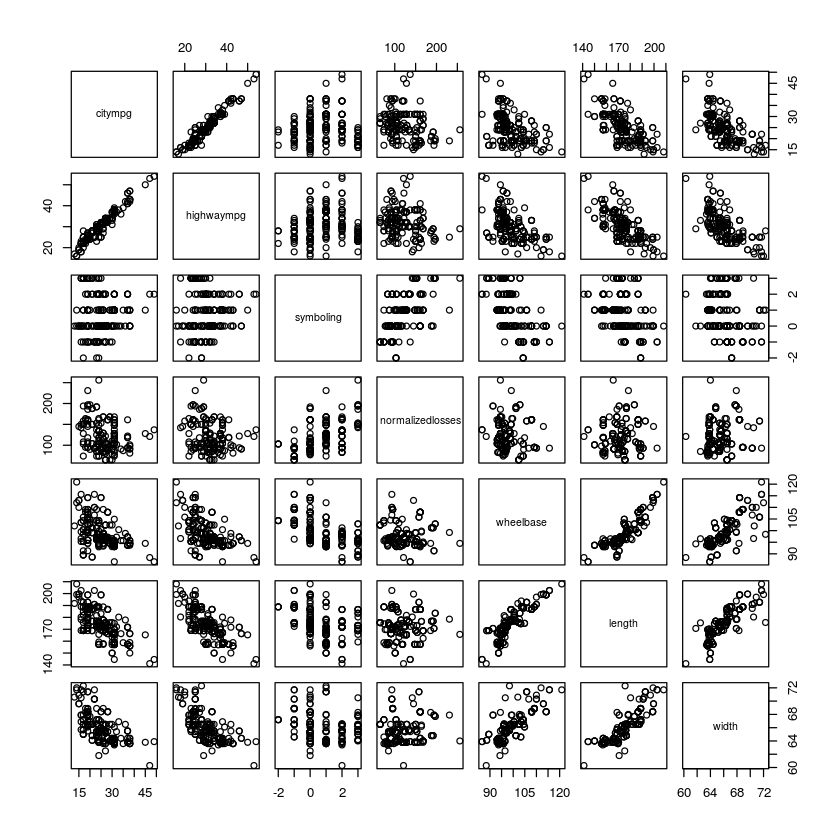

In [18]:
# lots of numerics, let's matrix-plot just a few at a time, so our plots stay nice and big.
plot(automobile[,c('citympg','highwaympg','symboling','normalizedlosses','wheelbase','length','width')])

#### _citympg_ and _highwaympg_ are highly-correlated, as are _wheelbase_ vs. _length;_ and  _length_ vs. _width_

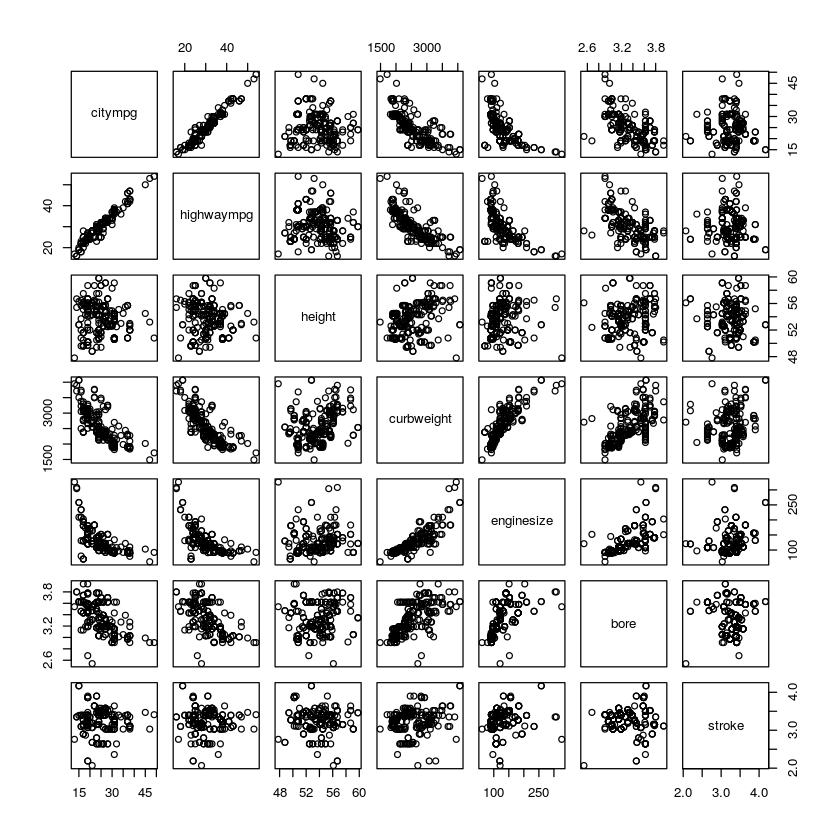

In [12]:
# Potential linear relationships with length and width. Let's try some more.
plot(automobile[,c('citympg','highwaympg','height','curbweight','enginesize', 'bore','stroke')])

### In this set, the most promising (semi) linear relationships with mpg are _curbweight_ and  _enginesize_.  The  _curbweight_ vs.  _enginesize_ relationsip is also close to linear.

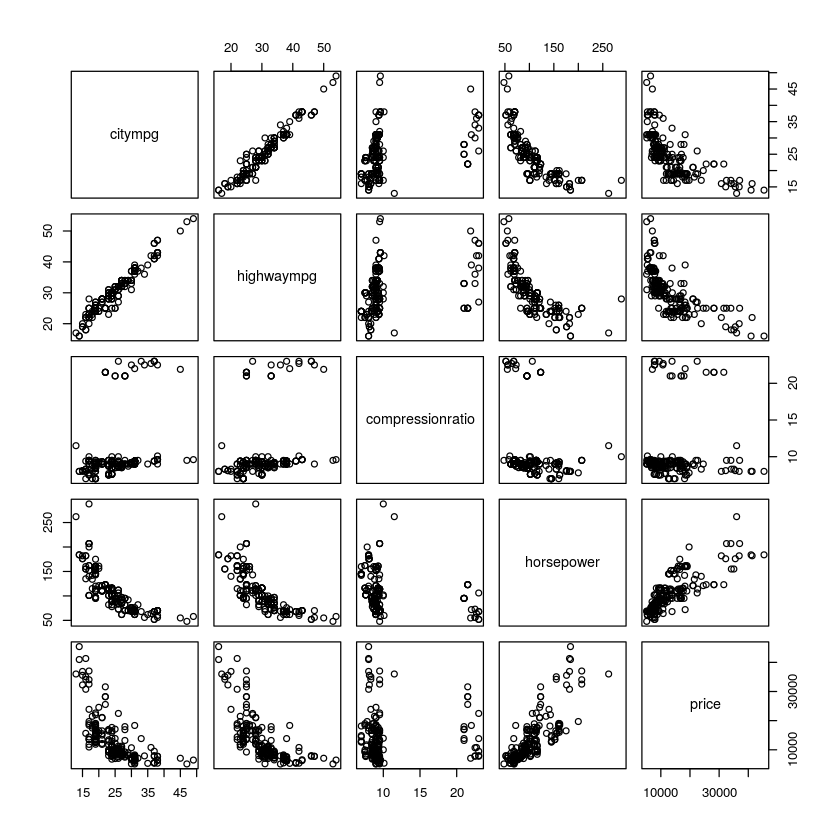

In [13]:
# The most promising columns in the batch above are curbweight and enginesize. 
# Let's try some more.
plot(automobile[,c('citympg','highwaympg','compressionratio','horsepower','price')])

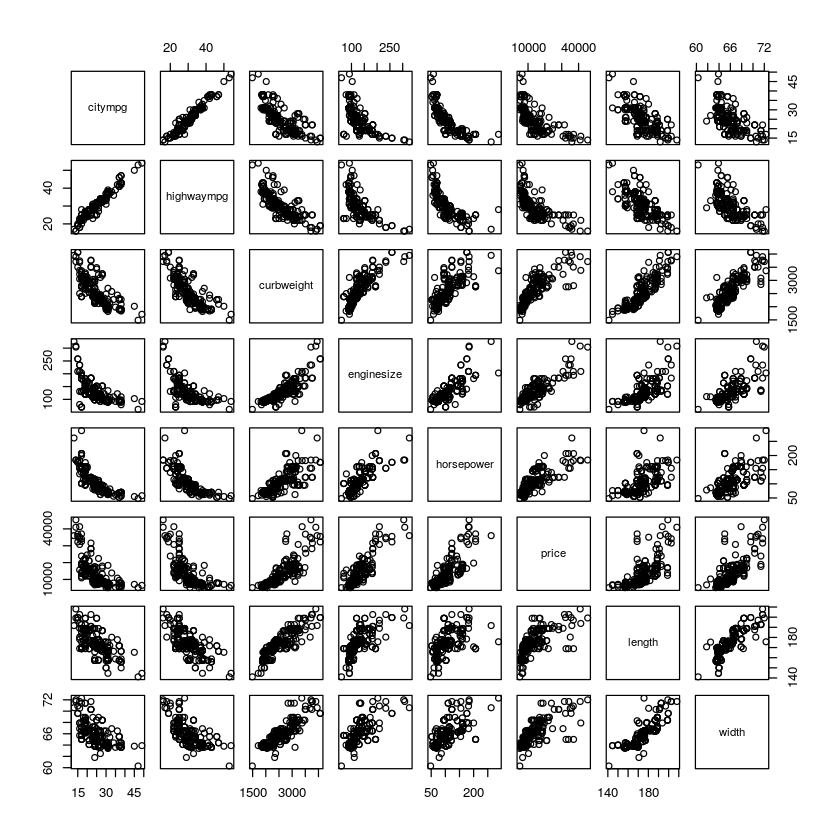

In [14]:
# horsepower and price show some promise; let's try all our best ones
plot(automobile[,c('citympg','highwaympg','curbweight','enginesize','horsepower','price', 'length', 'width')])

### Seeing everything together, _curbweight_, _enginesize_, and _horsepower_ seem to provide the strongest linear relationships.

## 5. Create a linear model to predict citympg.
Based on what we learned from the scatterplots, we'll create a formula with _highwaympg_ as the response variable, and _curbweight_, _enginesize_, and _horsepower_ as the predictors.

In [15]:
car_formula <- with(automobile, citympg~curbweight+enginesize+horsepower)
car_formula

citympg ~ curbweight + enginesize + horsepower
<environment: 0x1920d98>

In [16]:
#we can then use this formula to create a regression model
car_model <- lm(car_formula)
summary(car_model)


Call:
lm(formula = car_formula)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5115 -2.0765 -0.6388  1.4070 14.5214 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 47.7740137  1.3108772  36.444  < 2e-16 ***
curbweight  -0.0072510  0.0008913  -8.136 4.36e-14 ***
enginesize   0.0630347  0.0125698   5.015 1.17e-06 ***
horsepower  -0.1150638  0.0105403 -10.917  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.413 on 199 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7342,	Adjusted R-squared:  0.7302 
F-statistic: 183.2 on 3 and 199 DF,  p-value: < 2.2e-16


#### The singificance level Pr(>|t|) is tiny for all three varialbes; all of them rate 3-star significant codes. Both R-squared performance measures indicate _curbweight_, _enginesize_, and _horsepower_ explain over 72% of the variance in _highwaympg_.  F-statistic shows a tiny p-value, indicating the model is significant. 